In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
%matplotlib inline
dims = plt.figure(figsize=(8.5, 4.5))

In [27]:
df = pd.read_csv('./bank/bank-full.csv', sep=";")

In [28]:
rows, cols = df.shape
df.shape

(45211, 17)

In [29]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [30]:
nos, yes = df['y'].value_counts()
print(f"% of Nos: {nos/rows}")
print(f"% of Yes: {yes/rows}")

% of Nos: 0.8830151954170445
% of Yes: 0.11698480458295547


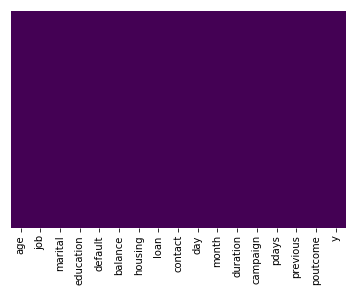

In [31]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

No missing values

In [32]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


- job
- marital
- education
- default
- housing
- loan
- contact
- day
- month
- poutcome

In [33]:
job = pd.get_dummies(df['job'], prefix='job')
marital = pd.get_dummies(df['marital'])
education = pd.get_dummies(df['education'], prefix='education')
default = pd.get_dummies(df['default'], drop_first=True, prefix='default')
housing = pd.get_dummies(df['housing'], drop_first=True, prefix='housing')
loan = pd.get_dummies(df['loan'], drop_first=True, prefix='loan')
contact = pd.get_dummies(df['contact'], prefix='contact')
day = pd.get_dummies(df['day'], prefix='day')
month = pd.get_dummies(df['month'])
poutcome = pd.get_dummies(df['poutcome'], prefix='poutcome')
y = pd.get_dummies(df['y'], drop_first=True, prefix='dependent_var')

In [34]:
df_drops = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'y'], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
df_dummies = pd.concat([df_drops, job, marital, education, default, housing, loan, contact, day, month, poutcome, y], axis=1)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE

In [38]:
X = df_dummies.drop('dependent_var_yes', axis=1)
y = df_dummies.loc[:,'dependent_var_yes']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [95]:
sm = SMOTE(random_state=12, ratio=)

In [96]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

/Users/gdiaz/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [86]:
lrmodel = LogisticRegression()

In [87]:
lrmodel.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
lg_predictions = lrmodel.predict(X_test)

In [89]:
print("LOGISTIC REGRESSION")
print(classification_report(y_test, lg_predictions))

LOGISTIC REGRESSION
             precision    recall  f1-score   support

          0       0.97      0.86      0.91     11967
          1       0.43      0.82      0.56      1597

avg / total       0.91      0.85      0.87     13564



In [90]:
print("LOGISTIC REGRESSION")
print(confusion_matrix(y_test, lg_predictions))

LOGISTIC REGRESSION
[[10238  1729]
 [  293  1304]]


In [91]:
fpr, tpr, thresholds = roc_curve(y_test, lg_predictions)

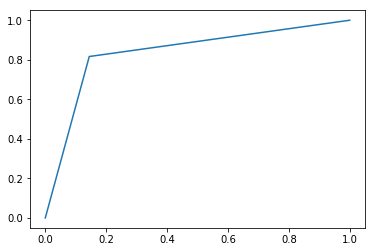

In [92]:
plt.plot(fpr, tpr)
plt.show()